# Exploratory Data Analysis of the positive dataset before being processed through CD-HIT or MMSeqs2
Display graphs and plots (matplotlib)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read our positive dataset .csv file
df = pd.read_csv('ProducedDatasets/PhageAcr_positive_dataset.csv') # Read our positive dataset .csv file

In [3]:
# Metrics for Sequence Size
print("min size:", df['Size'].min())                # Minimum of sequence size
print("max size:", df['Size'].max())                # Maximum of sequence size
print("mean:", int(round(df['Size'].mean(), 0)))    # Mean of sequence size
print("median:", int(df['Size'].median()))          # Median of sequence size
print("sd:", round(df['Size'].std(), 6))            # Standard Deviation of sequence size

min size: 47
max size: 528
mean: 125
median: 129
sd: 39.086594


In [4]:
# Defining an extra column "Genus"
df['Genus'] = df['Organism'].str.split().str[0]             # Extracts the Genus of the Organism species name
genus_counts = df['Genus'].value_counts().reset_index()     # Counts Genus occurrences
genus_counts.columns = ['Genus', 'Incidences']              # Renames columns

df_genus_incidences = genus_counts.sort_values(by='Genus').reset_index(drop=True) # Creates a new DataFrame with Genus and Incidences columns
df_genus_incidences

,Genus,Incidences
0,Absiella,1
1,Acetatifactor,1
2,Acetobacter,1
3,Acholeplasma,1
4,Achromobacter,2
...,...,...
260,Xanthomonas,5
261,Xenophilus,1
262,Xenorhabdus,9
263,Yersinia,15


In [5]:
df.head()

,ID,Sequence,Organism,Family,Type,Size,Protein Acr,Genus
0,RGB60049.1,MSIYTDMIPAILLVNDPQDSLSGAPIENYVKVSNINVAIYKNDSFK...,Absiella sp.,AcrIIA8,II-A,105,Yes,Absiella
1,WP_103240931.1,MSCPFQAMEGGNGMERKMALREFCGRYRKGDFKGTERAVQIEAGWY...,Acetatifactor muris,AcrIIA11,II-A,195,Yes,Acetatifactor
2,WP_086652143.1,MELIHTSDEVIKKIHKDGTFDTFLFFSASKYLAGSVASRKHYTYKI...,Acetobacter cibinongensis,AcrIF11,I-F,179,Yes,Acetobacter
3,WP_012242545.1,MEKQQLLKDLIQAFNSGSFESSDVKVQIKAGWYDWFCKDSSLKNKT...,Acholeplasma laidlawii,AcrIIA11,II-A,144,Yes,Acholeplasma
4,WP_062681378.1,MQLFHTSPSEISTITSTGRFGSFLFFSARAYTMTAGEALVYSLEID...,Achromobacter denitrificans,AcrIF11,I-F,150,Yes,Achromobacter


## Acr Protein Sequences that are above the typical Acr Protein size

In [6]:
## Check how many sequences have a size greater than 200
filtered_df = df[df['Size'] > 200].sort_values(by='Size')   # Filter rows where "Size" column is greater than 200

print(filtered_df.shape)
#filtered_df # Uncomment to display

(56, 8)


In [7]:
# Count number of Genera
df['Genus'].nunique()

265

## Frequency of Genera with sequences >200aa in size

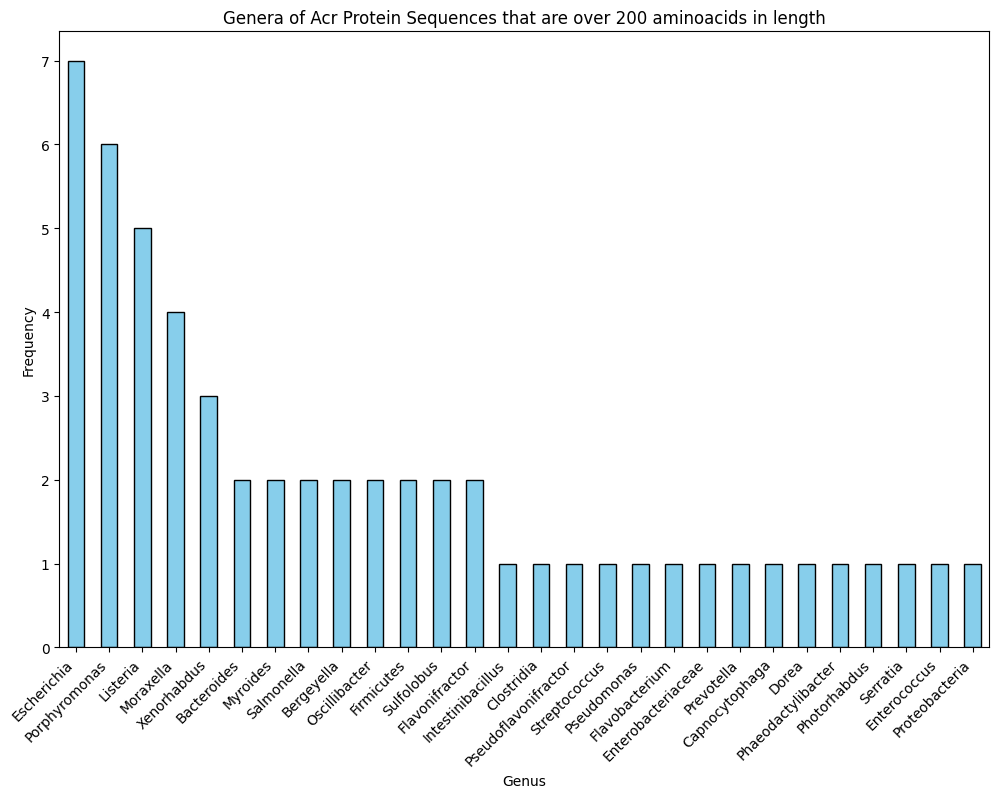

In [8]:
# Check most frequent Genera in this filtered dataframe
genus_counts = filtered_df['Genus'].value_counts()

plt.figure(figsize=(12, 8))
genus_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Genera of Acr Protein Sequences that are over 200 aminoacids in length')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.show()

# Protein Size by Genera (Top 53)
Top 53 because we have 265 genera (265 / 5 = 53)

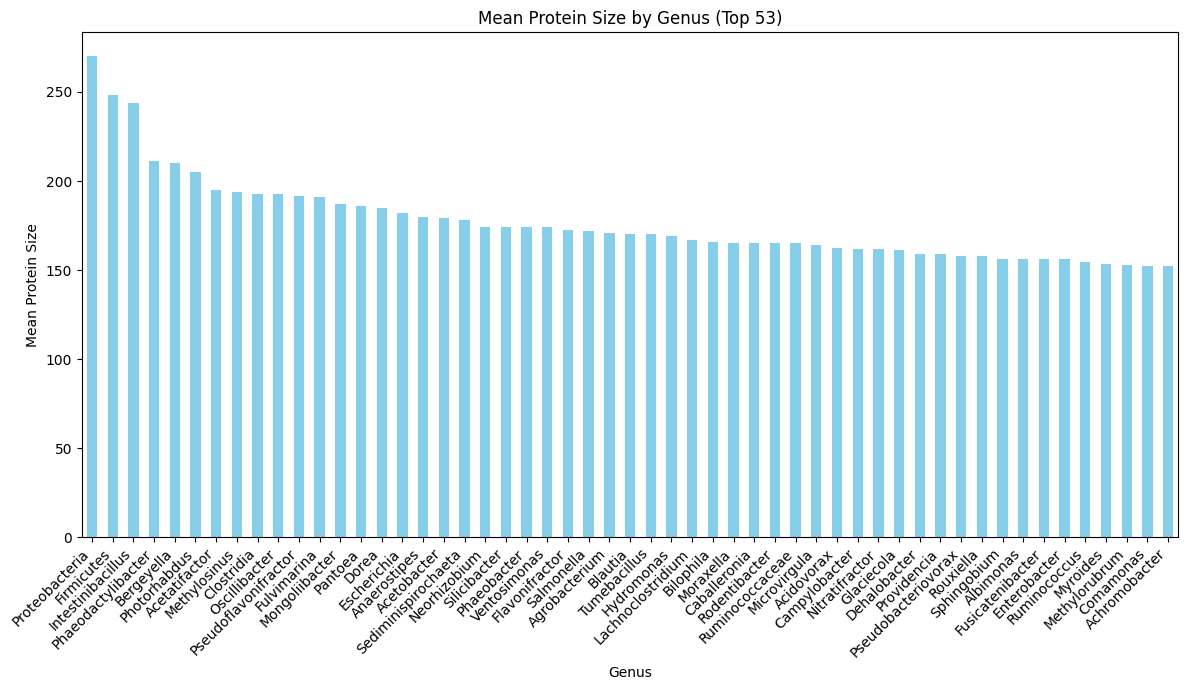

In [9]:
import matplotlib.pyplot as plt

# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting the top 53 genera
top_genus_mean_size = genus_mean_size.head(53)

# Creating a bar plot
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Mean Protein Size by Genus (Top 53)')
plt.xlabel('Genus')
plt.ylabel('Mean Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Protein Size by Genera (Top 53) where Genera that occur less than 5 times are colored in red

The bars in orange represent the Genera which have less than 5 occurrences:


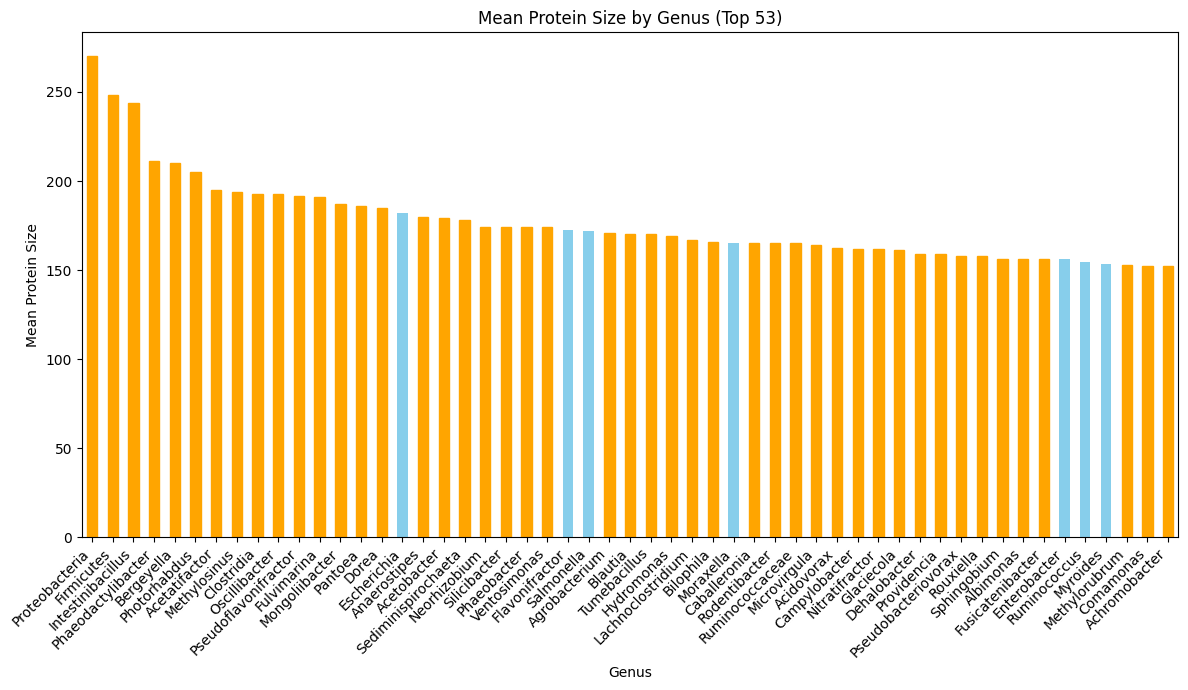

In [10]:
# Creating a bar plot
plt.figure(figsize=(12, 7))
bars = top_genus_mean_size.plot(kind='bar', color='skyblue')

# Color genera occurring less than 5 times in red
for bar in bars.patches:
    genus_name = top_genus_mean_size.index[bars.patches.index(bar)]
    if df['Genus'].value_counts()[genus_name] < 5:
        bar.set_color('orange')

print('The bars in orange represent the Genera which have less than 5 occurrences:')
plt.title('Mean Protein Size by Genus (Top 53)')
plt.xlabel('Genus')
plt.ylabel('Mean Protein Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sequence Size by Genera that occur more than 5 times in the dataset (all cases)

The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:


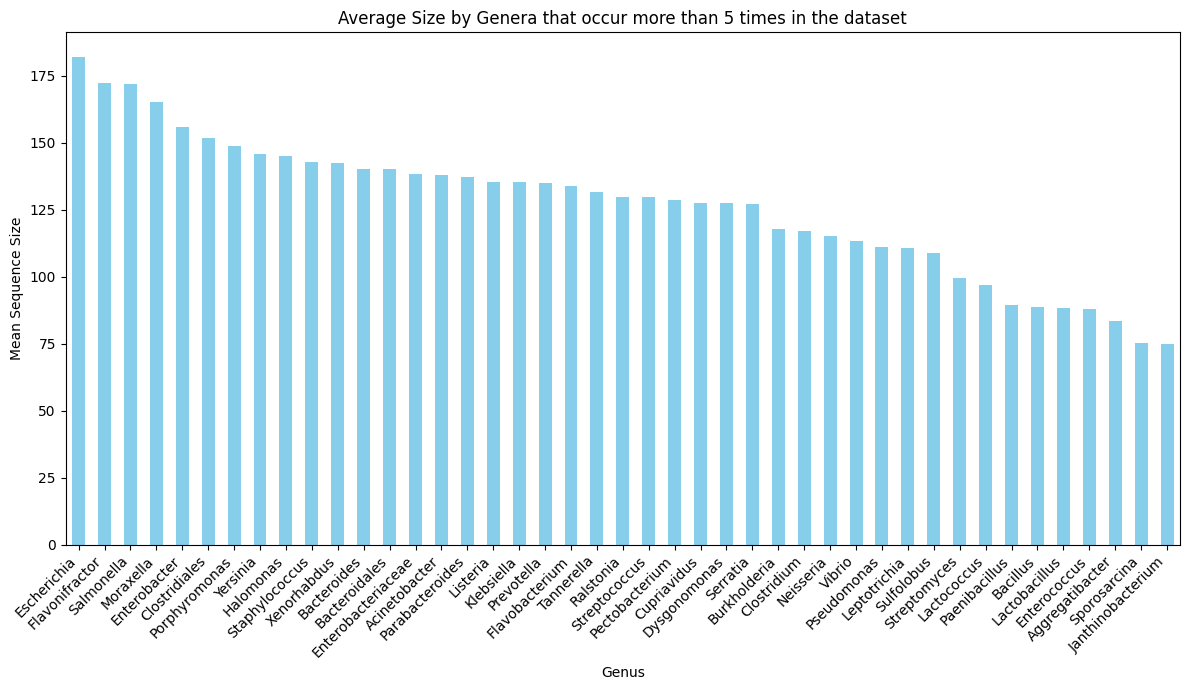

In [11]:
# Filter out genera with a frequency less than 5 counts
genus_counts = df['Genus'].value_counts()
valid_genus = genus_counts[genus_counts > 5].index
df_filtered = df[df['Genus'].isin(valid_genus)]

# Grouping by 'Genus' and calculating mean protein size for each genus
genus_mean_size = df_filtered.groupby('Genus')['Size'].mean().sort_values(ascending=False)

# Selecting all the genera
top_genus_mean_size = genus_mean_size.head(265)

# Creating a bar plot
print('The following is the average Sequence Size of ALL Genera that have more than 5 occurrences in the dataset:')
plt.figure(figsize=(12, 7))
top_genus_mean_size.plot(kind='bar', color='skyblue')
plt.title('Average Size by Genera that occur more than 5 times in the dataset')
plt.xlabel('Genus')
plt.ylabel('Mean Sequence Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Distribution of Sequence Sizes
Plot Type: Histogram
This plot will help us understand the distribution of the lengths of the Acr protein sequences.

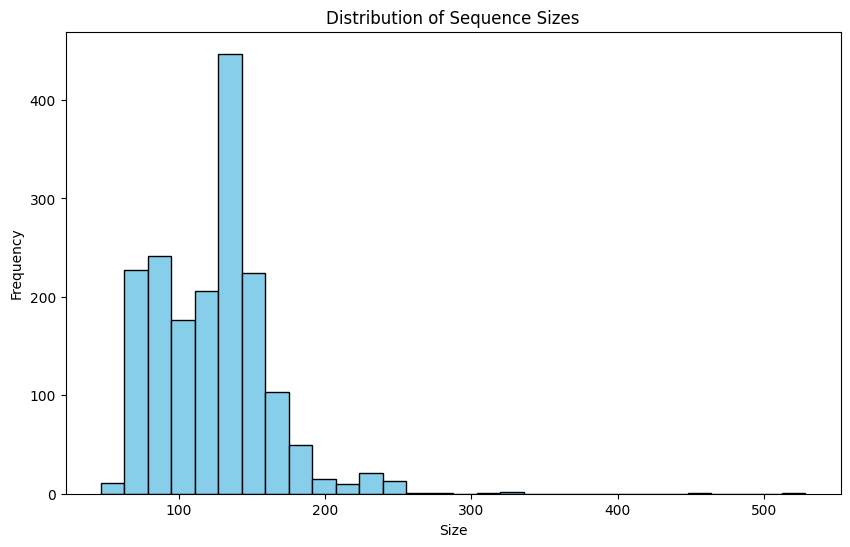

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Size'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sequence Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

# Frequency of Genera

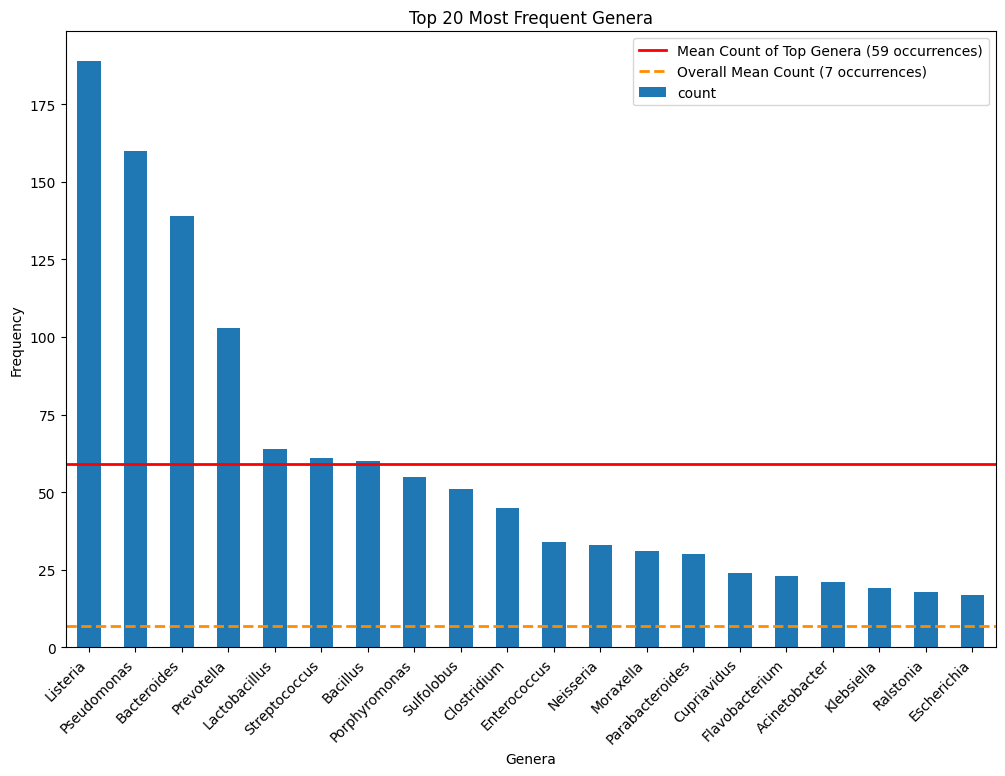

In [13]:
# Obtain gene counts
genus_counts = df['Genus'].value_counts()

# Get the top 20 most frequent genera
top_genera = genus_counts.head(20)

# Calculate the mean count of occurrences of all genera
overall_mean_count = round(genus_counts.mean())

# Calculate the mean count of occurrences of top genera
mean_count = round(top_genera.mean())

# Plot the data
plt.figure(figsize=(12, 8))
top_genera.plot(kind='bar')  # Use the default color for the bars
plt.axhline(y=mean_count, color='red', linestyle='-', linewidth=2, label=f'Mean Count of Top Genera ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='darkorange', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Top 20 Most Frequent Genera')
plt.xlabel('Genera')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()

# Sequence counts per Family

3. Number of Sequences per Family

Plot Type: Bar Chart

This plot will show the distribution of sequences across different families.

In [14]:
len(df['Family'].unique())

131

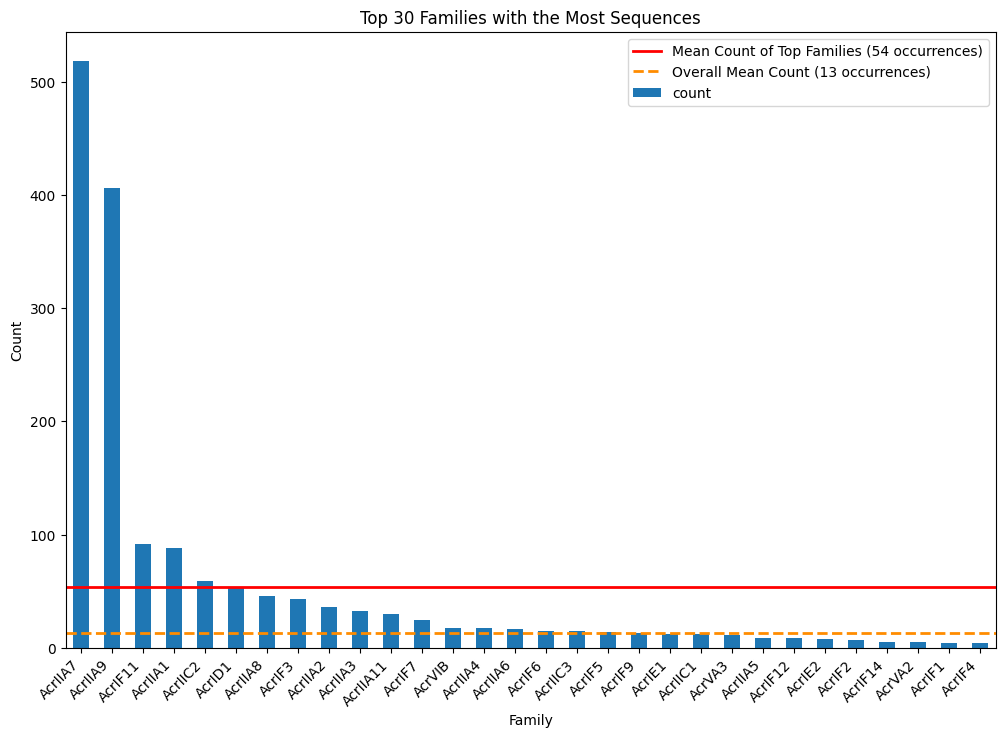

In [15]:
# Obtain Family counts
family_counts = df['Family'].value_counts()

# Get the top 20 most frequent genera
top_family = family_counts.head(30)

# Calculate the mean count of occurrences of all genera
overall_mean_count = round(family_counts.mean())

# Calculate the mean count of occurrences of top genera
mean_count = round(top_family.mean())

plt.figure(figsize=(12, 8))
df['Family'].value_counts().head(30).plot(kind='bar')
plt.axhline(y=mean_count, color='red', linestyle='-', linewidth=2, label=f'Mean Count of Top Families ({mean_count} occurrences)')
plt.axhline(y=overall_mean_count, color='darkorange', linestyle='--', linewidth=2, label=f'Overall Mean Count ({overall_mean_count} occurrences)')
plt.title('Top 30 Families with the Most Sequences')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.legend()
plt.show()
